In [1]:
import numpy as np
import pandas as pd 
import random

In [2]:
import os

In [3]:
import tensorflow as tf
print(tf.__version__)
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

2.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
import os
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
from sklearn.datasets import load_files
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
from keras.preprocessing import image                  
from tqdm import tqdm

import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [5]:
# Pretty display for notebooks
%matplotlib inline

In [6]:
TEST_DIR = os.path.join(os.getcwd(),"imgs","test")
TRAIN_DIR = os.path.join(os.getcwd(),"imgs","train")
MODEL_PATH = os.path.join(os.getcwd(),"model","self_trained")
PICKLE_DIR = os.path.join(os.getcwd(),"pickle_files")
CSV_DIR = os.path.join(os.getcwd(),"csv_files")

In [7]:
if not os.path.exists(TEST_DIR):
    print("Testing data does not exists")
if not os.path.exists(TRAIN_DIR):
    print("Training data does not exists")
if not os.path.exists(MODEL_PATH):
    print("Model path does not exists")
    os.makedirs(MODEL_PATH)
    print("Model path created")
if not os.path.exists(PICKLE_DIR):
    os.makedirs(PICKLE_DIR)
if not os.path.exists(CSV_DIR):
    os.makedirs(CSV_DIR)

Testing data does not exists
Training data does not exists


In [8]:
directory = r'C:\Users\91995\Desktop\state-farm-distracted-driver-detection\imgs\train'
test_directory = r'C:\Users\91995\Desktop\state-farm-distracted-driver-detection\imgs\test'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [9]:
img_size = 240

In [10]:
import cv2
import matplotlib.pyplot as plt

In [11]:
pip install numpy

In [12]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


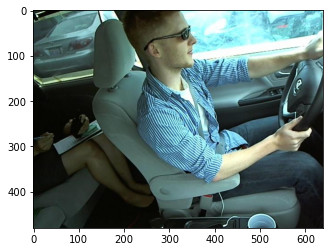

In [13]:
# Train class image for display.
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
        break
    break

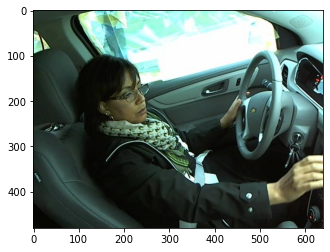

In [14]:
# Test class image for display.
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    test_array = RGB_img
    plt.imshow(RGB_img)
    plt.show()
    break

In [15]:
# checkking image size using shape.
print(img_array.shape)

(480, 640, 3)


(240, 240, 3)


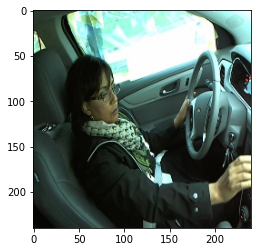

In [16]:
new_img = cv2.resize(test_array,(img_size,img_size))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [17]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img = cv2.resize(RGB_img,(img_size,img_size))
            training_data.append([new_img,class_num])


In [18]:
create_training_data()

In [19]:
print(len(training_data))

22424


In [20]:
random.shuffle(training_data)
x = []
y = []

In [21]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [22]:
len(x),len(y)

(22424, 22424)

In [23]:
x[0].shape

(240, 240, 3)

In [24]:
x = np.array(x).reshape(-1,img_size,img_size,3)
x[0].shape

(240, 240, 3)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=96)

In [26]:
del x,y

In [27]:
import gc
gc.collect()

30

In [28]:
from tensorflow.keras import utils

In [29]:
Y_train = utils.to_categorical(y_train,num_classes=10)
Y_test = utils.to_categorical(y_test,num_classes=10)


In [30]:
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [31]:
model = models.Sequential()
## CNN 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 238, 238, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 238, 238, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 238, 238, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                        

In [33]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callback = [callbacks.EarlyStopping(monitor='val_accuracy',patience=5)]
batch_size = 50
n_epochs = 5

In [ ]:
Classes Definitions
c0: safe driving
c1: texting - right
c2: talking on the phone - right
c3: texting - left
c4: talking on the phone - left
c5: operating the radio
c6: drinking
c7: reaching behind
c8: hair and makeup
c9: talking to passenger

In [36]:
model.save_weights('./driverdistraction_lr_weights.project4', overwrite=True)

In [38]:
model.save('./Nayeem_mohd.driverdistraction.project4')

INFO:tensorflow:Assets written to: ./Nayeem_mohd.driverdistraction.project4\assets
